## 0. Load data and preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_final.csv')

In [3]:
data.dtypes

Answer.age                             int64
Answer.easy.concentration              int64
Answer.easy.conversation               int64
Answer.energetic                       int64
Answer.game.normal.time              float64
Answer.game.yesterday.time           float64
Answer.leisure.ideal.time            float64
Answer.leisure.minimum.time          float64
Answer.leisure.normal.time           float64
Answer.leisure.yesterday.time        float64
Answer.sleep.ideal.time              float64
Answer.sleep.minimum.time            float64
Answer.sleep.normal.time             float64
Answer.sleep.yesterday.time          float64
Answer.sleepy                          int64
Answer.socialize.ideal.time          float64
Answer.socialize.minimum.time        float64
Answer.socialize.normal.time         float64
Answer.socialmedia.normal.time       float64
Answer.socialmedia.yesterday.time    float64
Answer.tired                           int64
Answer.work.ideal.time               float64
Answer.wor

In [4]:
cat_list = ['Answer.ethnicity',
 'Answer.bed.time.yesterday',
 'Answer.gender',
 'Answer.income',
 'Answer.introvert',
 'Answer.location',
 'Answer.marital',
 'Answer.meal.minimum',
 'Answer.meal.normal',
 'Answer.meal.yesterday',
 'Answer.occupation',
 'Answer.prefer.activity',
 'Answer.rise.time.normal',
 'Answer.rise.time.yesterday',
 'Answer.social.event.yesterday']


for col in cat_list:
    data[col]  = pd.Categorical(data[col])

In [5]:
cat_indices = [data.columns.get_loc(c) for c in cat_list if c in data]

#### get correlation except for nominal variables

In [6]:
from scipy.stats import pearsonr

corr_df = pd.DataFrame()
X = data.drop(['Energy_today', 'Answer.ethnicity',\
              'Answer.gender', 'Answer.location', \
              'Answer.marital','Answer.occupation','Answer.prefer.activity'], axis=1)
y = data['Energy_today']
corr_df['X_var'] = X.columns.tolist()

corr_vec = []
for i in range(X.shape[1]):
    corr, _ = pearsonr(X.iloc[:,i], y)
    corr_vec.append(corr)

corr_df['Pearsons_r'] = corr_vec
corr_df.reindex(corr_df['Pearsons_r'].abs().sort_values(ascending = False).index)

,X_var,Pearsons_r
2,Answer.easy.conversation,0.692397
1,Answer.easy.concentration,0.624894
3,Answer.energetic,0.519902
25,Answer.yesterday.energy,0.310735
20,Answer.tired,0.237546
24,Answer.work.yesterday.time,0.186558
21,Answer.work.ideal.time,0.173586
13,Answer.sleep.yesterday.time,0.147395
27,Answer.youtube.yesterday.time,0.145557
14,Answer.sleepy,0.136011


## K-Modes

In [7]:
# !pip install kmodes
from kmodes.kmodes import KModes

km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

#append cluster to dataframe
data['Cluster_kmodes'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 176, cost: 15008.0
Run 1, iteration: 2/100, moves: 44, cost: 15004.0
Run 1, iteration: 3/100, moves: 1, cost: 15004.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 149, cost: 14951.0
Run 2, iteration: 2/100, moves: 64, cost: 14917.0
Run 2, iteration: 3/100, moves: 24, cost: 14910.0
Run 2, iteration: 4/100, moves: 5, cost: 14910.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 176, cost: 14988.0
Run 3, iteration: 2/100, moves: 46, cost: 14981.0
Run 3, iteration: 3/100, moves: 0, cost: 14981.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 161, cost: 14991.0
Run 4, iteration: 2/100, moves: 62, cost: 14976.0
Run 4, iteration: 3/100, moves: 6, cost: 14976.0
Init: initializing centroids
I

## K-Prototype

In [8]:
from kmodes.kprototypes import KPrototypes

kp=KPrototypes(n_clusters=3, init='Huang')
cluster=kp.fit_predict(data, categorical=cat_indices)

In [9]:
data['Cluster_kprototype'] = cluster

## K-Means

In [10]:
from sklearn.cluster import KMeans

In [11]:
data2 = pd.read_csv('data_final.csv',
           encoding = "ISO-8859-1")

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data2)
data['Cluster_kmeans'] = kmeans.labels_

## Output data

In [13]:
file_name="data_clustered_3.csv"
data.to_csv(file_name, index=False)

In [66]:
data.columns.tolist()

['Answer.age',
 'Answer.easy.concentration',
 'Answer.easy.conversation',
 'Answer.energetic',
 'Answer.game.normal.time',
 'Answer.game.yesterday.time',
 'Answer.leisure.ideal.time',
 'Answer.leisure.minimum.time',
 'Answer.leisure.normal.time',
 'Answer.leisure.yesterday.time',
 'Answer.sleep.ideal.time',
 'Answer.sleep.minimum.time',
 'Answer.sleep.normal.time',
 'Answer.sleep.yesterday.time',
 'Answer.sleepy',
 'Answer.socialize.ideal.time',
 'Answer.socialize.minimum.time',
 'Answer.socialize.normal.time',
 'Answer.socialmedia.normal.time',
 'Answer.socialmedia.yesterday.time',
 'Answer.tired',
 'Answer.work.ideal.time',
 'Answer.work.minimum.time',
 'Answer.work.normal.time',
 'Answer.work.yesterday.time',
 'Answer.yesterday.energy',
 'Answer.youtube.normal.time',
 'Answer.youtube.yesterday.time',
 'Answer.location',
 'Answer.marital',
 'Answer.meal.minimum',
 'Answer.meal.normal',
 'Answer.meal.yesterday',
 'Answer.occupation',
 'Answer.prefer.activity',
 'Answer.rise.time.norma

In [67]:
data_oct = data.drop(columns = ['Answer.easy.concentration',
 'Answer.easy.conversation',
 'Answer.energetic',
  'Answer.sleepy', 'Answer.tired', 'Cluster_kprototype',
 'Cluster_kmeans'])
file_name="data_clustered_3_oct.csv"
data_oct.to_csv(file_name, index=False)

## 2. Visualize via PCA
### Not really intuitive, need to find a better alternative

In [ ]:
# !pip install plotly

In [14]:
#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [34]:
#Visualize clusters via PCA
#https://www.kaggle.com/minc33/visualizing-high-dimensional-clusters

#plotX is a DataFrame containing 5000 values sampled randomly from X
# plotX = pd.DataFrame(np.array(data.sample(30)))

plotX = pd.DataFrame(np.array(data))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = data.columns

In [35]:
plotX.columns

Index(['Answer.age', 'Answer.easy.concentration', 'Answer.easy.conversation',
       'Answer.energetic', 'Answer.game.normal.time',
       'Answer.game.yesterday.time', 'Answer.leisure.ideal.time',
       'Answer.leisure.minimum.time', 'Answer.leisure.normal.time',
       'Answer.leisure.yesterday.time', 'Answer.sleep.ideal.time',
       'Answer.sleep.minimum.time', 'Answer.sleep.normal.time',
       'Answer.sleep.yesterday.time', 'Answer.sleepy',
       'Answer.socialize.ideal.time', 'Answer.socialize.minimum.time',
       'Answer.socialize.normal.time', 'Answer.socialmedia.normal.time',
       'Answer.socialmedia.yesterday.time', 'Answer.tired',
       'Answer.work.ideal.time', 'Answer.work.minimum.time',
       'Answer.work.normal.time', 'Answer.work.yesterday.time',
       'Answer.yesterday.energy', 'Answer.youtube.normal.time',
       'Answer.youtube.yesterday.time', 'Answer.location', 'Answer.marital',
       'Answer.meal.minimum', 'Answer.meal.normal', 'Answer.meal.yesterday',
 

In [36]:
#initialize PCA

#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [37]:
np.shape(plotX)

(497, 49)

In [38]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster_kmodes"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster_kmodes"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster_kmodes"], axis=1)))

In [39]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [40]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')
plotX["dummy"] = 0

In [41]:
cluster0 = plotX[plotX["Cluster_kmodes"] == 0]
cluster1 = plotX[plotX["Cluster_kmodes"] == 1]
cluster2 = plotX[plotX["Cluster_kmodes"] == 2]

In [42]:
init_notebook_mode(connected=True)

In [43]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(170, 201, 103, 0.85)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(103, 146, 201, 0.85)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                   x = cluster2["PC1_3d"],
                   y = cluster2["PC2_3d"],
                   z = cluster2["PC3_3d"],
                   mode = "markers",
                   name = "Cluster 2",
                   marker = dict(color = 'rgba(201, 103, 110, 0.85)'),
                   text = None)

data_pca = [trace1, trace2, trace3]
#data_pca = [trace1, trace2]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data_pca, layout = layout)

iplot(fig)

## 3. Visualize via t-SNE (Sean? Sean: Yes Ma'dam!)

In [64]:
num_clusters = 3

#km = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
#clusters = km.fit_predict(data)

# Print the cluster centroids
# print(km.cluster_centroids_)

#append cluster to dataframe
#data['Cluster'] = clusters

### tSNE
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=55)

#### “perplexity”: it says (loosely) how to balance attention between local and global aspects of your data. 

#### The parameter is, in a sense, a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

### T-SNE Plot on all features

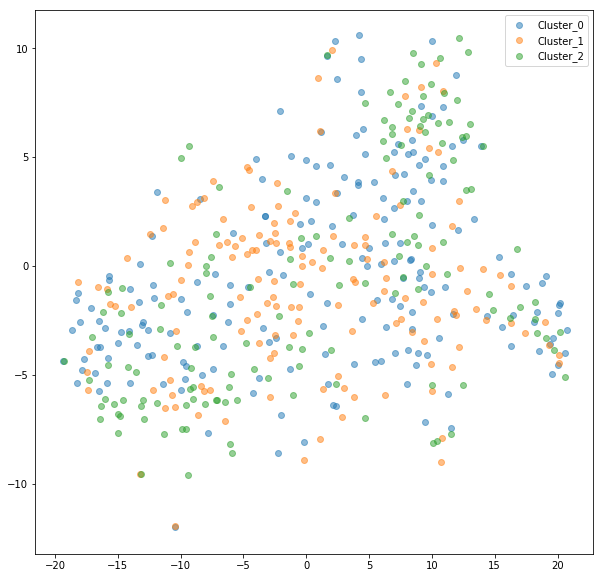

In [65]:
# week_data = array_17[data_index]
data_tsne = tsne.fit_transform(data)

data_tsne.shape

# data_tsne

# data['Cluster']

data_tsne_cluster = pd.DataFrame({'tsne_0': data_tsne[:,0], 'tsne_1': data_tsne[:,1], 'Cluster': data['Cluster_kmodes']})

data_tsne

# In[216]:
plt.figure(figsize=(10,10))

for i in range(num_clusters):
    cluster_data = data_tsne_cluster[data_tsne_cluster['Cluster'] == i]
    plt.scatter(cluster_data['tsne_0'], cluster_data['tsne_1'], label='Cluster_{}'.format(i), alpha=0.5)
    
plt.legend()
plt.show()

### T-SNE Plot on top 10 PCA features

In [ ]:
#PCA with three principal components
pca_tsne = PCA(n_components=10)

# plotX = pd.concat([plotX, pca_tsne], axis=1, join='inner')

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D

plotX = pd.DataFrame(np.array(data))
# plotX = pd.concat([plotX,pca_tsne], axis=1, join='inner')
# plotX["dummy"] = 0
plotX.columns = data.columns
plotX

PCs_tsne = pd.DataFrame(pca_tsne.fit_transform(plotX.drop(["Cluster"], axis=1)))

PCs_tsne = pd.concat([plotX['Cluster'],PCs_tsne], axis=1, join='inner')
# PCs_tsne

PCs_tsne_plot = tsne.fit_transform(PCs_tsne)
# PCs_tsne_plot

PCs_tsne_plot = pd.DataFrame({'tsne_0': PCs_tsne_plot[:,0], 'tsne_1': PCs_tsne_plot[:,1], 'Cluster': PCs_tsne['Cluster']})


plt.figure(figsize=(10,10))

for i in range(num_clusters):
    cluster_data = PCs_tsne_plot[PCs_tsne_plot['Cluster'] == i]
    plt.scatter(cluster_data['tsne_0'], cluster_data['tsne_1'], label='Cluster_{}'.format(i), alpha=0.5)
    
plt.legend()
plt.show()